# Reinforcement learning from scratch: homework 1

Haoyang Han 

hhr8512

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

In [1]:
# import custom libraries
from custom_library import basic_optimizers as optimizers
from custom_library import variable_order_plotters as plotter

# import autograd functionality
import autograd.numpy as np

# import path to datasets
datapath = 'datasets/'

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib notebook

# autoreload function - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import copy

#### <span style="color:#a50e3e;">Exercise 1: </span>  Perform system identification on a small chunk of cruise control data 

In this exercise you will create a system model - denoted as $f_{\text{system}}$ in the [course notes](https://www.dropbox.com/s/m6456ze0fd8kaf8/system_identification_pid_notes.pdf?dl=0) - using a small snippet of cruise control data shown below.  Here our `output sequence` are states $\left\{s_t\right\}_{t=1}^T$, and the `input sequence` corresponding actions $\left\{a_t\right\}_{t=1}^{T-1}$ (we can ignore any finanl action $a_T$ since there is no next state $s_{t+1}$ to regress it on in learning our system model).  Notice at each update step the action is clipped to lie in the range $[-50,100]$ - which is the angle of the pedal against the floor of the car.  Here a negative angle indicates that 'regenerative braking' was applied.

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


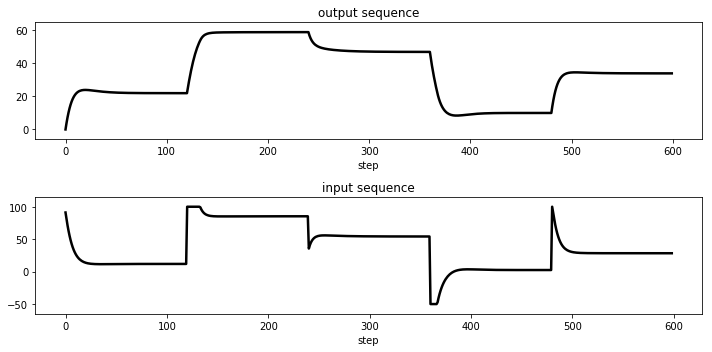

In [3]:
# load in cruise control data
data = np.loadtxt(datapath + 'cruise_control_data.csv',delimiter = ',')

# extract actions and states 
actions = data[0,1:][np.newaxis,:] # our T-1 actions
states = data[1,:][np.newaxis,:]   # our T states

# plot the test pair
plotter.plot_pair(actions,states)



In [4]:
data[:5]

array([[ 0.        , 91.12505169, 80.68971471, ..., 28.32267594,
        28.32263555, 28.32259758],
       [ 0.        ,  3.90652309,  7.33612106, ..., 34.00286046,
        34.00268926, 34.00252831]])

In [5]:
# A simple (order 1 MDP, linear) system model implementation
def system_model(s_t,a_t,w):
    return w[0] + w[1]*s_t + w[2]*a_t


In [6]:
# loop for evaluating system_model over all input/output action/state pairs
def system_loop(w,a,s):
# compute least squares over all system model outputs at once s_predict = [s[:,0]] # container for system_model state outputs for t in range(a.shape[1]):
    # get current action-state pair
    s_predict = []
    for t in range(len(a.T)):
        a_t = a[:,t]
        s_t = s[:,t]
        # feed into system_model to get predicted output
        s_hat = system_model(s_t,a_t,w)
        # store prediction
        s_predict.append(s_hat)
    # array-afy predictions and return
    return np.array(s_predict).T

In [7]:
# an implementation of the least squares cost for system identification # note here: s is an (1 x T) array and a an (1 x T-1) array
def least_squares(w,a,s):
# system_loop - runs over all action-state pairs and produces entire # state prediction set
    s_predict = system_loop(w,a,s)
    # compute least squares error between real and predicted states
    cost = np.sum((s_predict[:,1:] - s[:,2:])**2) 
    return cost/float(s.shape[1]-1)

In [8]:
# initialize parameters
alpha = 10**(-4)
max_its = 200
w0 = [1.0,2.0,3.0]
g = least_squares
w_hist1, train_hist = optimizers.gradient_descent(g, w0, actions, states, alpha, max_its, True)

step 2 done in 0.1 secs, train cost = 2158.3399
step 3 done in 0.2 secs, train cost = 238.1382
step 4 done in 0.2 secs, train cost = 117.3458
step 5 done in 0.1 secs, train cost = 103.936
step 6 done in 0.2 secs, train cost = 97.2867
step 7 done in 0.2 secs, train cost = 91.3927
step 8 done in 0.1 secs, train cost = 85.8758
step 9 done in 0.2 secs, train cost = 80.6932
step 10 done in 0.2 secs, train cost = 75.8237
step 11 done in 0.1 secs, train cost = 71.2483
step 12 done in 0.2 secs, train cost = 66.9492
step 13 done in 0.2 secs, train cost = 62.9097
step 14 done in 0.2 secs, train cost = 59.1142
step 15 done in 0.2 secs, train cost = 55.5479
step 16 done in 0.2 secs, train cost = 52.1969
step 17 done in 0.2 secs, train cost = 49.0484
step 18 done in 0.2 secs, train cost = 46.0899
step 19 done in 0.2 secs, train cost = 43.3102
step 20 done in 0.2 secs, train cost = 40.6983
step 21 done in 0.2 secs, train cost = 38.2441
step 22 done in 0.2 secs, train cost = 35.9382
step 23 done in 0

step 179 done in 0.2 secs, train cost = 0.0626
step 180 done in 0.2 secs, train cost = 0.0624
step 181 done in 0.2 secs, train cost = 0.0623
step 182 done in 0.2 secs, train cost = 0.0622
step 183 done in 0.2 secs, train cost = 0.0621
step 184 done in 0.2 secs, train cost = 0.062
step 185 done in 0.2 secs, train cost = 0.0619
step 186 done in 0.2 secs, train cost = 0.0618
step 187 done in 0.2 secs, train cost = 0.0618
step 188 done in 0.2 secs, train cost = 0.0617
step 189 done in 0.2 secs, train cost = 0.0616
step 190 done in 0.2 secs, train cost = 0.0615
step 191 done in 0.2 secs, train cost = 0.0615
step 192 done in 0.2 secs, train cost = 0.0614
step 193 done in 0.2 secs, train cost = 0.0614
step 194 done in 0.2 secs, train cost = 0.0613
step 195 done in 0.2 secs, train cost = 0.0613
step 196 done in 0.1 secs, train cost = 0.0612
step 197 done in 0.2 secs, train cost = 0.0612
step 198 done in 0.2 secs, train cost = 0.0611
step 199 done in 0.1 secs, train cost = 0.0611
step 200 done 

In [9]:
s_pred = system_loop(w_hist1[-1],actions,states)
s_pred.shape

(1, 599)

In [10]:
actions.shape

(1, 599)

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


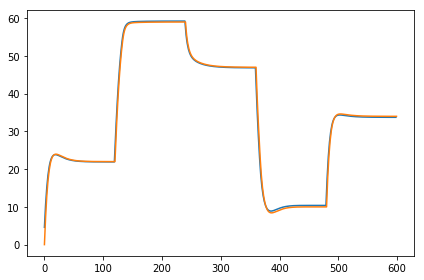

In [11]:
x = range(600)
x1 = range(599)

#s_pred = s_pred.tolist()
#states = states.tolist()
plt.plot(x1,s_pred.T)
plt.plot(x,states.T)
plt.show()

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


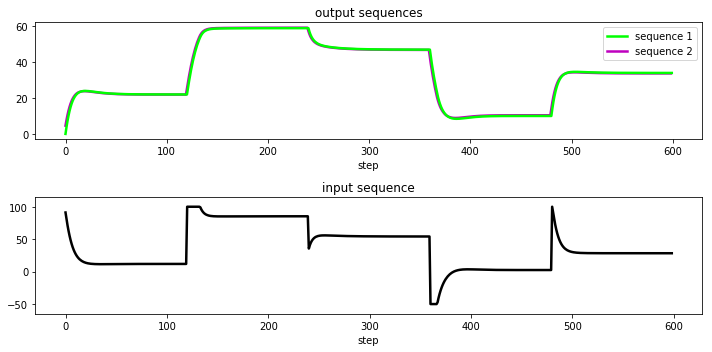

In [12]:
plotter.plot_multiple_sequences(actions,states,s_pred)

Some more particulars: here you need to learn the weights of a basic order $1$ linear system model - which takes the form

\begin{equation}
s_{t+1} = f_{\text{system}}\left(s_t,a_t; \mathbf{w}_\text{system}\right) = w_0 + w_1s_t + w_2a_t
\end{equation}

by properly minimizing the associated Least Squares cost function

\begin{equation}
\frac{1}{T-1}\sum_{t=1}^{T-1}\left(f_{\text{system}}\left(s_t,a_t; \mathbf{w}_\text{system}\right) - s_{t+1}\right)^2
\end{equation}

over the weights $\mathbf{w}_{\text{system}} = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix}$ where $T$ is the length of our training action sequence.  


- Build a `Python` version of the system model and Least Squares cost function and minimize it using a first order method.  Use the entire dataset provided for training (i.e., do not worry about validation error)


- A simple full batch gradient descent module has been provided in file file `basic_optimizers.py` in the `custom_library` directory for use with this exercise.


- After properly minimizing the Least Squares cost above make a plot like the one shown below - which shows the original state data in black, and the system model approximation in blue.  Your trained model should be able to match the data quite well.

<figure>
<p>
<img src= 'images/system_id_1.png' width="150%" height="150%" alt=""/>
</p>
</figure>

#### <span style="color:#a50e3e;">Exercise 2: </span>  Train an unregularized PID controller for the cruise control problem

In this exercise you will tune the parameters of a PID controller automatically so that the system model trained in the previous exercise matches the example set point sequence shown below.  Note: you need to have finished the previous exercise in order to properly solve this one!

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


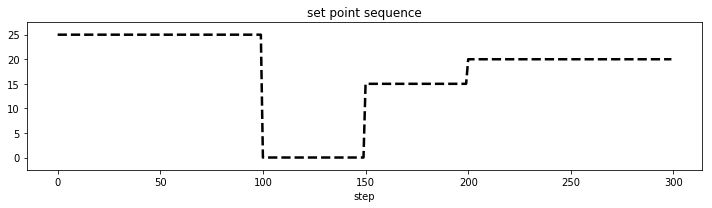

In [13]:
# load in set point sequence
csvname = 'datasets/cruise_setpoints.csv'
set_points = np.loadtxt(csvname,delimiter = ',')[np.newaxis,:]

# plot set point sequence
plotter.plot_setpoints(set_points)

In [14]:
set_points[:,3]

array([25.])

In [15]:
# a simple implementation of a PID controller
def PID_controller(e_t,h_t,d_t,w): 
    # note here in terms of inputs 
    # e_t = current error
    # h_t = integral of error
    # d_t = derivative of error
    return w[0] + w[1]*e_t + w[2]*h_t + w[3]*d_t

In [16]:
# loop for evaluating control model over all input/output action/state pairs
# Our inputs here:
# s_1 - the initial condition state
# x - sequence of training set points
# w - the control model parameters
def control_loop(w,x):
    # initialize key variables and containers s_t = copy.deepcopy(s_1)
    s_t = 0
    h_t = 0
    d_t = 0
    frac = 1/3
    action_history = []
    state_history = [s_t]
    error_history = []
    # loop over training set points and run through controller, then # system models
    for t in range(np.size(x) - 1):
        # get current set point
        x_t = x[:,t]
        # update error
        e_t = x_t - s_t
        error_history.append(e_t)
        # update integral of error
        h_t = h_t + frac*e_t
        
        # update derivative of error
        if t > 0:
            d_t = frac*(error_history[-1] - error_history[-2])
        
        # send error, integral, and derivative to PID controller
        a_t = PID_controller(e_t,h_t,d_t,w)
        
        # clip a_t to match system specifications?
    
    
        # clip inputs to -50% to 100% for car
        if a_t >= 100.0:
            a_t = 100.0 
        if a_t <= -50.0:
            a_t = -50.0
        # send action to system model
        s_t = tuned_system_model(s_t,a_t)
        # store state output, and actions (for plotting)
        state_history.append(s_t)
        action_history.append(a_t)
        
    # transition to arrays
    state_history = np.array(state_history)[np.newaxis,:]
    action_history = np.array(action_history)[np.newaxis,:]
    
    # return velocities and control history
    return state_history,action_history

In [17]:
# an implementation of the least squares cost for PID controller tuning 
# note here: s is an (1 x T) array and a an (1 x T-1) array
def least_squares_PID(w,x):
# system_loop - runs over all action-state pairs and produces entire # state prediction set
    s_predict, action_predict = control_loop(w,x)
    # compute least squares error between real and predicted states
    cost = np.sum((s_predict[:,1:] - x[:,1:])**2) 
    return cost/float(x.shape[1]-1)

In [19]:
# tuned_system_model = lambda state,action: s_invnorm(system_model(s_norm(stat e),a_norm(action),w_best))
w_best = np.copy(w_hist1[-1])
tuned_system_model = lambda state,action: system_model(state,action,w_best) 
s_1 = 0.0

In [21]:
# initialize parameters
alpha = 5*10**(-3)
max_its = 200
# this parameter is not randomly setted, I iterated for several time and get this conclusion
w0 = np.array([1.0, 1.0, 1.0, 1.0])
g = least_squares_PID
w_hist2, train_hist = optimizers.PID_gradient_descent(g, w0, set_points, alpha, max_its, True)

the gradient value is: [-0.05139454 -9.17295978 -7.00809269 -0.08840162]
step 2 done in 0.2 secs, train cost = 25.4483
the gradient value is: [-0.04828128 -8.80023314 -5.95893584 -0.09923752]
step 3 done in 0.3 secs, train cost = 24.9018
the gradient value is: [-0.04570777 -8.45369367 -5.04375085 -0.11088598]
step 4 done in 0.3 secs, train cost = 24.4272
the gradient value is: [-0.04356123 -8.16849853 -4.74211382 -0.10917877]
step 5 done in 0.3 secs, train cost = 23.995
the gradient value is: [-0.04164676 -7.8831584  -3.9299985  -0.12280936]
step 6 done in 0.2 secs, train cost = 23.6131
the gradient value is: [-0.04004596 -7.66973156 -3.73679335 -0.12066399]
step 7 done in 0.3 secs, train cost = 23.2546
the gradient value is: [-0.03858364 -7.4725729  -3.56255535 -0.1185539 ]
step 8 done in 0.2 secs, train cost = 22.9243
the gradient value is: [-0.0372556  -7.22259422 -2.84040936 -0.13481352]
step 9 done in 0.2 secs, train cost = 22.6266
the gradient value is: [-0.03614795 -7.06806048 -

the gradient value is: [-0.0242607  -2.16248208  0.49642083  0.0279851 ]
step 72 done in 0.3 secs, train cost = 17.0803
the gradient value is: [-0.02426523 -2.15204917  0.48824481  0.02797674]
step 73 done in 0.2 secs, train cost = 17.056
the gradient value is: [-0.02426924 -2.14173774  0.48025509  0.02796672]
step 74 done in 0.3 secs, train cost = 17.032
the gradient value is: [-0.02427275 -2.13154532  0.47244562  0.02795511]
step 75 done in 0.2 secs, train cost = 17.0082
the gradient value is: [-0.02427575 -2.12146956  0.46481063  0.02794199]
step 76 done in 0.3 secs, train cost = 16.9847
the gradient value is: [-0.02427828 -2.11150814  0.45734458  0.02792744]
step 77 done in 0.2 secs, train cost = 16.9614
the gradient value is: [-0.02428034 -2.10165886  0.45004219  0.02791151]
step 78 done in 0.3 secs, train cost = 16.9384
the gradient value is: [-0.02428194 -2.09191956  0.44289836  0.02789429]
step 79 done in 0.2 secs, train cost = 16.9156
the gradient value is: [-0.0242831  -2.082

the gradient value is: [-0.02333909 -1.64465032  0.15246611  0.02623985]
step 141 done in 0.2 secs, train cost = 15.8388
the gradient value is: [-0.02332055 -1.63922234  0.15066244  0.02620022]
step 142 done in 0.3 secs, train cost = 15.8253
the gradient value is: [-0.02330199 -1.63383743  0.14888801  0.02616066]
step 143 done in 0.2 secs, train cost = 15.8118
the gradient value is: [-0.02328338 -1.62849509  0.14714224  0.02612117]
step 144 done in 0.3 secs, train cost = 15.7985
the gradient value is: [-0.02326475 -1.62319478  0.14542459  0.02608175]
step 145 done in 0.2 secs, train cost = 15.7852
the gradient value is: [-0.02324609 -1.61793601  0.14373454  0.02604241]
step 146 done in 0.3 secs, train cost = 15.772
the gradient value is: [-0.0232274  -1.61271827  0.14207155  0.02600315]
step 147 done in 0.3 secs, train cost = 15.7589
the gradient value is: [-0.02320868 -1.60754106  0.14043512  0.02596397]
step 148 done in 0.3 secs, train cost = 15.7459
the gradient value is: [-0.023189

In [22]:
state, action = control_loop(w_hist2[-1], set_points)

In [23]:
w_hist2[-1]

array([1.02480776, 3.61025814, 1.0974711 , 0.99763903])

In [24]:
states.shape
set_points.shape

(1, 300)

In [ ]:
x = range(300)
x1 = range(300)

#s_pred = s_pred.tolist()
#states = states.tolist()
plt.plot(x,set_points.T)
plt.plot(x,state.T)
plt.show()

In [ ]:
set_points.shape

In [ ]:
action = np.asarray(action)
action = action.reshape([1,299])
action.shape

In [ ]:
state = state.reshape(1,300)
state.shape

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


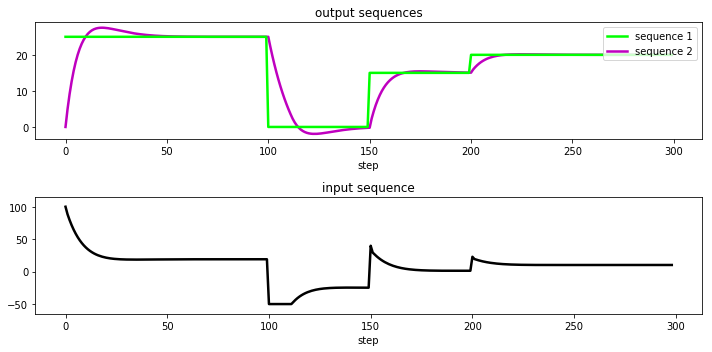

In [25]:
plotter.plot_3fer(action,set_points,state,plot_type = 'continuous')

Implement a `Pythonic` version of the PID controller Least Squares cost function discussed in the [course notes](https://www.dropbox.com/s/m6456ze0fd8kaf8/system_identification_pid_notes.pdf?dl=0).  You should be able to learn an action / state sequence pair so that your system model responds fairly well to the input set point sequence.  The image below shows the results of an action/state sequence pair learned by a fully tuned PID controller.  The top panel shows the set point sequence in dashed black, with the state sequence defined by the controller in blue.  The bottom panel shows the corresponding action sequence defined by the controller. 

A few notes: 
- For this exercise you need not worry about regularizing either the state or action sequences when training the controller - simply tune it as best as you can.


- Even though a PID controller is technically a Recurrent Network (which can be slow to train), here we only deal with a fairly small dataset of set points and there only 4 parameters to tune - so you can apply the simplest kind of first order algorithm to properly minimize the controller cost (e.g., a full batch gradient descent optimizer). 

<figure>
<p>
<img src= 'images/PID_1.png' width="150%" height="150%" alt=""/>
</p>
</figure>

#### <span style="color:#a50e3e;">Exercise 3: </span>  System identification on the two-tank problem 

In this exercise you will create a system model - using a small snippet of cruise control data shown below.  This comes from a real life two-tanks experiment as shown on page 4 of the [course notes](https://www.dropbox.com/s/m6456ze0fd8kaf8/system_identification_pid_notes.pdf?dl=0).  The amount of water allowed into the top tank (per second) - the action sequence $a_t$ - is shown as the black curve in the bottom panel.  In the top panel the *upper* tank water level $s_{1,t}$ is shown in green, and the bottom tank level $s_{2,t}$ is shown in magenta.

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


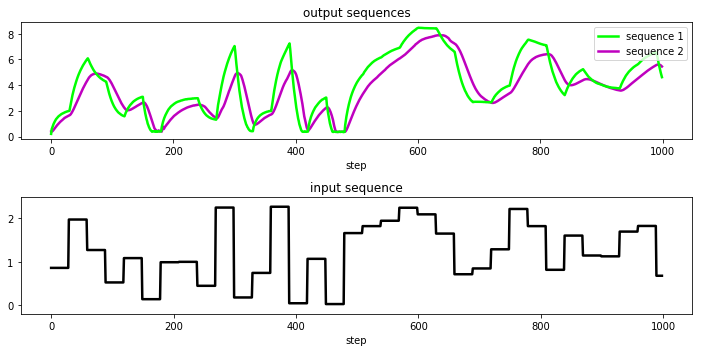

In [26]:
# This code cell will not be shown in the HTML version of this notebook
# load series
data = np.loadtxt(datapath + 'cascaded_tanks_1.csv',delimiter = ',')
actions = data[0:1,1:]
states = data[1:,:]

# plot the test pair
plotter.plot_3fer(actions,states[0],states[1],plot_type = 'continuous')

In [27]:
states[0].shape

(1000,)

In [28]:
w0 = [1.0,1.0,1.0]
alpha = 10**(-3)
g=least_squares
states0 = np.reshape(states[0],(1,len(states[0])))
states1 = np.reshape(states[1],(1,len(states[1])))
w_hist0,train_hist0 = optimizers.gradient_descent(g,w0,actions,states0,alpha,max_its,True)
w_hist1,train_hist1 = optimizers.gradient_descent(g,w0,actions,states1,alpha,max_its,True)

step 2 done in 0.3 secs, train cost = 4.9323
step 3 done in 0.3 secs, train cost = 4.5073
step 4 done in 0.3 secs, train cost = 4.1225
step 5 done in 0.3 secs, train cost = 3.7739
step 6 done in 0.3 secs, train cost = 3.4583
step 7 done in 0.3 secs, train cost = 3.1725
step 8 done in 0.3 secs, train cost = 2.9136
step 9 done in 0.3 secs, train cost = 2.6791
step 10 done in 0.3 secs, train cost = 2.4667
step 11 done in 0.3 secs, train cost = 2.2744
step 12 done in 0.4 secs, train cost = 2.1002
step 13 done in 0.3 secs, train cost = 1.9424
step 14 done in 0.3 secs, train cost = 1.7995
step 15 done in 0.3 secs, train cost = 1.67
step 16 done in 0.3 secs, train cost = 1.5527
step 17 done in 0.4 secs, train cost = 1.4465
step 18 done in 0.3 secs, train cost = 1.3502
step 19 done in 0.3 secs, train cost = 1.263
step 20 done in 0.3 secs, train cost = 1.184
step 21 done in 0.3 secs, train cost = 1.1124
step 22 done in 0.4 secs, train cost = 1.0475
step 23 done in 0.3 secs, train cost = 0.9887


step 180 done in 0.3 secs, train cost = 0.3592
step 181 done in 0.3 secs, train cost = 0.3588
step 182 done in 0.3 secs, train cost = 0.3584
step 183 done in 0.3 secs, train cost = 0.358
step 184 done in 0.3 secs, train cost = 0.3575
step 185 done in 0.3 secs, train cost = 0.3571
step 186 done in 0.3 secs, train cost = 0.3567
step 187 done in 0.3 secs, train cost = 0.3563
step 188 done in 0.3 secs, train cost = 0.3559
step 189 done in 0.3 secs, train cost = 0.3555
step 190 done in 0.3 secs, train cost = 0.3551
step 191 done in 0.3 secs, train cost = 0.3547
step 192 done in 0.3 secs, train cost = 0.3543
step 193 done in 0.4 secs, train cost = 0.3539
step 194 done in 0.3 secs, train cost = 0.3535
step 195 done in 0.3 secs, train cost = 0.3531
step 196 done in 0.3 secs, train cost = 0.3527
step 197 done in 0.3 secs, train cost = 0.3523
step 198 done in 0.3 secs, train cost = 0.3519
step 199 done in 0.3 secs, train cost = 0.3515
step 200 done in 0.3 secs, train cost = 0.351
step 201 done i

step 157 done in 0.3 secs, train cost = 0.5458
step 158 done in 0.3 secs, train cost = 0.5448
step 159 done in 0.3 secs, train cost = 0.5437
step 160 done in 0.4 secs, train cost = 0.5427
step 161 done in 0.3 secs, train cost = 0.5417
step 162 done in 0.3 secs, train cost = 0.5407
step 163 done in 0.3 secs, train cost = 0.5396
step 164 done in 0.3 secs, train cost = 0.5386
step 165 done in 0.3 secs, train cost = 0.5376
step 166 done in 0.3 secs, train cost = 0.5366
step 167 done in 0.3 secs, train cost = 0.5356
step 168 done in 0.3 secs, train cost = 0.5346
step 169 done in 0.4 secs, train cost = 0.5336
step 170 done in 0.3 secs, train cost = 0.5326
step 171 done in 0.3 secs, train cost = 0.5316
step 172 done in 0.3 secs, train cost = 0.5306
step 173 done in 0.3 secs, train cost = 0.5296
step 174 done in 0.3 secs, train cost = 0.5286
step 175 done in 0.3 secs, train cost = 0.5276
step 176 done in 0.3 secs, train cost = 0.5266
step 177 done in 0.4 secs, train cost = 0.5256
step 178 done

In [29]:
w_hist = w_hist0[-1]+w_hist1[-1]
w_hist

[array(0.8205848),
 array(0.6147095),
 array(0.79428204),
 array(0.79601366),
 array(0.62002101),
 array(0.6905309)]

/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


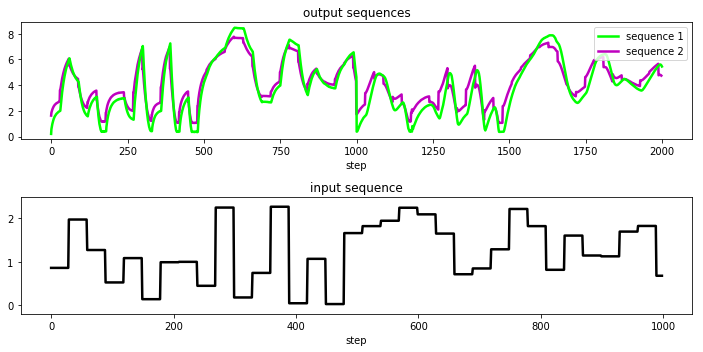

In [30]:
predictions = system_loop(w=w_hist,a=actions,s=states)

plotter.plot_3fer(actions,states,predictions,plot_type = 'continuous')



This system has two $s_{1,t}$ and $s_{2,t}$, hence the system model consists of an equation for each.  The upper tank level $s_{1,t}$ is dependent on its own history and - of course- the amount of water $a_t$ that is poured into it.  A simple linear system model for it then looks like

\begin{equation}
s_{1,t+1} = w_0 + w_1 s_{1,t} + w_2 a_t.
\end{equation}

Since we know that the upper tank drains into the lower one, the simplest sort of system model we can make for the lower tank level $s_{2,t}$ is that it is proportional to its prior value and that of the upper tank, as

\begin{equation}
s_{2,t+1} = w_3 + w_4s_{2,t} + w_5 s_{1,t}.
\end{equation}

Together - using the simplest model for this system we could think of - we have the following two system model equations

\begin{array}
\
s_{1,t+1} = w_0 + w_1 s_{1,t} + w_2 a_t \\
s_{2,t+1} = w_3 + w_4s_{2,t} + w_5 s_{1,t}.
\end{array}

Tune the parameters of this system model $w_0$ through $w_5$ via minimizing a Least Squares cost function, using the data shown above for training (i.e., you need not cut off a chunk of it for validation - use it all for training).  Make sure to plot the fit your model provides on the training data.  You can see this exact system model fit to this exact dataset in the course notes - make sure your fit looks fairly similar.